# Exploratory Data Analysis of New York Schools


PASSNYC uses public data to identify students within New York City’s under-performing school districts and, 
through consulting and collaboration with partners, aims to increase the diversity of students taking the
Specialized High School Admissions Test (SHSAT). By focusing efforts in under-performing areas that are 
historically underrepresented in SHSAT registration, we will help pave the path to specialized high schools 
for a more diverse group of students.
        
    Datasets that are available for this project are 
        1) School explorer dataset with demographic and academic details of students  in all NYC public schools 
        2) SHSAT data set that has details of the count of students  schools, the number that enrolls for tests , count that 
           take the test and that count that gets offer.
    
Inorder to aid PASSNYC,  the data sets have to be explored in detail to  check whether any trends or patterns can be observed that would help identify the schools that need help .

In [1]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns;sns.set(color_codes=True)

import  plotly.plotly  as py
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

%matplotlib inline

%pwd


'C:\\Users\\manju\\Desktop\\Springboard\\Capstone1'

In [2]:
pd.set_option('display.max_columns', None)  
school = pd.read_csv('2016 School Explorer.csv')
#safety = pd.read_csv('../input/eport/2010-2016-school-safety-report.csv')
schools = pd.read_csv('2013_-_2018_Demographic_Snapshot_School.csv')
shsat_1718 = pd.read_csv('2017-2018_SHSAT_Admissions_Test_Offers_By_Sending_School.csv')
shsat_1617 = pd.read_csv('2016-2017_SHSAT_Admissions_Test_Offers_By_Sending_School.csv')
shsat_1516 = pd.read_csv('2015-2016_SHSAT_Admissions_Test_Offers_By_Sending_School.csv')
print(school.info())
school.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Columns: 161 entries, Adjusted Grade to Grade 8 Math 4s - Economically Disadvantaged
dtypes: float64(5), int64(123), object(33)
memory usage: 1.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 161 columns):
Adjusted Grade                                        object
New?                                                  object
Other Location Code in LCGMS                          object
School Name                                           object
SED Code                                              int64
Location Code                                         object
District                                              int64
Latitude                                              float64
Longitude                                             float64
Address (Full)                                        object
City                                                 

In [3]:
shsat_1516["Year"] = '2015-16'
shsat_1516.loc[shsat_1516["Count of Offers"] == "0-5", "Count of Offers"] = "0"
shsat_1516.loc[shsat_1516["Count of Testers"] == "0-5", "Count of Testers"] = "0"
shsat_1516.loc[shsat_1516["Count of Students in HS Admissions"] == "0-5", "Count of Students in HS Admissions"] = "0"


shsat_1516["Offered_ratio"] = (shsat_1516["Count of Offers"].astype(float) / shsat_1516["Count of Students in HS Admissions"].astype(float))*100
shsat_1516["Offered_ratio"] = shsat_1516["Offered_ratio"].round(2)

shsat_1516 = shsat_1516.dropna(subset= ['Offered_ratio'])

shsat_1617["Year"] = '2016-17'
shsat_1617.loc[shsat_1617["Count of Offers"] == "0-5", "Count of Offers"] = "0"
shsat_1617.loc[shsat_1617["Count of Testers"] == "0-5", "Count of Testers"] = "0"
shsat_1617.loc[shsat_1617["Count of Students in HS Admissions"] == "0-5", "Count of Students in HS Admissions"] = "0"
shsat_1617["Offered_ratio"] = (shsat_1617["Count of Offers"].astype(float) / shsat_1617["Count of Students in HS Admissions"].astype(float))*100
shsat_1617["Offered_ratio"] = shsat_1617["Offered_ratio"].round(2)
shsat_1617 = shsat_1617.dropna(subset= ['Offered_ratio'])

shsat_1718["Year"] = '2017-18'
shsat_1718.loc[shsat_1718["Count of Offers"] == "0-5", "Count of Offers"] = "0"
shsat_1718.loc[shsat_1718["Count of Testers"] == "0-5", "Count of Testers"] = "0"
shsat_1718.loc[shsat_1718["Count of Students in HS Admissions"] == "0-5", "Count of Students in HS Admissions"] = "0"
shsat_1718["Offered_ratio"] = (shsat_1718["Count of Offers"].astype(float) / shsat_1718["Count of Students in HS Admissions"].astype(float))*100
shsat_1718["Offered_ratio"] = shsat_1718["Offered_ratio"].round()
shsat_1718 = shsat_1718.dropna(subset= ['Offered_ratio'])

shsat = [shsat_1516, shsat_1617, shsat_1718]
shsat_df = pd.concat(shsat, sort = True)


shsat_df.loc[shsat_df["Count of Offers"] == "0-5", "Count of Offers"] = "0"
shsat_df.loc[shsat_df["Count of Testers"] == "0-5", "Count of Testers"] = "0"
shsat_df.loc[shsat_df["Count of Students in HS Admissions"] == "0-5", "Count of Students in HS Admissions"] = "0"

shsat_df["Offered_ratio"] = (shsat_df["Count of Offers"].astype(float) / shsat_df["Count of Students in HS Admissions"].astype(float))*100
shsat_df["Offered_ratio"] = shsat_df["Offered_ratio"].round(2)



shsat_df = shsat_df.dropna(subset= ['Offered_ratio'])
shsat_df 
shsat_df

shsat_dfs =shsat_df[['Feeder School DBN','Feeder School Name','Offered_ratio']]
print(shsat_dfs.info())
shsat_dfs

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1656 entries, 0 to 593
Data columns (total 3 columns):
Feeder School DBN     1656 non-null object
Feeder School Name    1656 non-null object
Offered_ratio         1656 non-null float64
dtypes: float64(1), object(2)
memory usage: 51.8+ KB
None


,Feeder School DBN,Feeder School Name,Offered_ratio
0,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,0.00
1,01M140,P.S. 140 NATHAN STRAUS,0.00
2,01M184,P.S. 184M SHUANG WEN,48.72
4,01M301,"TECHNOLOGY, ARTS, AND SCIENCES STUDIO",0.00
6,01M378,SCHOOL FOR GLOBAL LEADERS,0.00
7,01M450,EAST SIDE COMMUNITY SCHOOL,0.00
8,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",71.05
9,01M839,TOMPKINS SQUARE MIDDLE SCHOOL,15.38
10,02M104,J.H.S. 104 SIMON BARUCH,25.64
11,02M114,EAST SIDE MIDDLE SCHOOL,64.95


In [4]:
school.info(verbose=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 161 columns):
Adjusted Grade                                        object
New?                                                  object
Other Location Code in LCGMS                          object
School Name                                           object
SED Code                                              int64
Location Code                                         object
District                                              int64
Latitude                                              float64
Longitude                                             float64
Address (Full)                                        object
City                                                  object
Zip                                                   int64
Grades                                                object
Grade Low                                             object
Grade High                             

In [5]:

len(school['School Name'].unique() )
school = school.loc[school['Grade 8 ELA 4s - All Students' ]  != 0]
len(school['School Name'].unique() )
school = school.loc[school['Grade 8 Math 4s - All Students' ] != 0]
len(school['School Name'].unique() )

#Select Schools that have upto Grade 8
schools_df  = schools.loc[schools['Grade 8'] != 0]
schools_df


,DBN,School Name,Year,Total Enrollment,Grade PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12,# Female,% Female,# Male,% Male,# Asian,% Asian,# Black,% Black,# Hispanic,% Hispanic,# Multiple Race Categories Not Represented,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
15,01M034,P.S. 034 Franklin D. Roosevelt,2013-14,393,18,33,32,35,34,45,43,43,57,53,0,0,0,0,196,49.9%,197,50.1%,26,6.6%,108,27.5%,246,62.6%,1,0.3%,12,3.1%,129,32.8%,25,6.4%,373,94.9%,No Data
16,01M034,P.S. 034 Franklin D. Roosevelt,2014-15,395,18,40,32,29,35,32,44,63,43,59,0,0,0,0,199,50.4%,196,49.6%,25,6.3%,110,27.8%,245,62%,1,0.3%,14,3.5%,119,30.1%,26,6.6%,381,96.5%,86.0%
17,01M034,P.S. 034 Franklin D. Roosevelt,2015-16,394,18,33,41,30,27,36,33,64,62,50,0,0,0,0,200,50.8%,194,49.2%,18,4.6%,113,28.7%,249,63.2%,0,0%,14,3.6%,122,31%,29,7.4%,384,97.5%,86.1%
18,01M034,P.S. 034 Franklin D. Roosevelt,2016-17,350,13,21,24,37,31,29,36,38,59,62,0,0,0,0,170,48.6%,180,51.4%,19,5.4%,102,29.1%,216,61.7%,2,0.6%,11,3.1%,130,37.1%,27,7.7%,348,99.4%,86.8%
19,01M034,P.S. 034 Franklin D. Roosevelt,2017-18,333,13,25,18,22,47,35,36,38,41,58,0,0,0,0,150,45%,183,55%,11,3.3%,106,31.8%,204,61.3%,3,0.9%,9,2.7%,122,36.6%,25,7.5%,325,97.6%,93.9%
40,01M140,P.S. 140 Nathan Straus,2013-14,393,12,30,31,31,34,34,28,61,63,69,0,0,0,0,194,49.4%,199,50.6%,22,5.6%,50,12.7%,310,78.9%,1,0.3%,10,2.5%,137,34.9%,55,14%,314,79.9%,No Data
41,01M140,P.S. 140 Nathan Straus,2014-15,380,18,26,29,27,35,32,34,53,65,61,0,0,0,0,198,52.1%,182,47.9%,21,5.5%,40,10.5%,302,79.5%,2,0.5%,15,3.9%,134,35.3%,65,17.1%,290,76.3%,84.8%
42,01M140,P.S. 140 Nathan Straus,2015-16,376,13,26,25,29,30,34,29,69,49,72,0,0,0,0,188,50%,188,50%,20,5.3%,47,12.5%,292,77.7%,4,1.1%,13,3.5%,132,35.1%,54,14.4%,296,78.7%,86.1%
43,01M140,P.S. 140 Nathan Straus,2016-17,382,18,31,28,25,28,32,34,64,66,56,0,0,0,0,182,47.6%,200,52.4%,18,4.7%,45,11.8%,304,79.6%,4,1%,11,2.9%,124,32.5%,45,11.8%,287,75.1%,84.3%
44,01M140,P.S. 140 Nathan Straus,2017-18,371,18,28,29,24,24,28,29,60,65,66,0,0,0,0,182,49.1%,189,50.9%,21,5.7%,46,12.4%,292,78.7%,2,0.5%,10,2.7%,115,31%,36,9.7%,324,87.3%,90.6%


In [6]:
school_merg = pd.merge(schools_df, 
                  shsat_df,
                  left_on= ['School Name'],
                  right_on=['Feeder School Name'],
                  how='left')
school_merg = school_merg.dropna(subset=['Offered_ratio'])

school_merg.head()


,DBN,School Name,Year_x,Total Enrollment,Grade PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12,# Female,% Female,# Male,% Male,# Asian,% Asian,# Black,% Black,# Hispanic,% Hispanic,# Multiple Race Categories Not Represented,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index,Count of Offers,Count of Students in HS Admissions,Count of Testers,Feeder School DBN,Feeder School Name,Offered_ratio,Year_y
71,02M131,M.S. 131,2013-14,445,0,0,0,0,0,0,0,115,140,190,0,0,0,0,209,47%,236,53%,334,75.1%,44,9.9%,65,14.6%,1,0.2%,1,0.2%,101,22.7%,200,44.9%,431,96.9%,No Data,12,57,57,02M131,M.S. 131,21.05,2015-16
72,02M131,M.S. 131,2013-14,445,0,0,0,0,0,0,0,115,140,190,0,0,0,0,209,47%,236,53%,334,75.1%,44,9.9%,65,14.6%,1,0.2%,1,0.2%,101,22.7%,200,44.9%,431,96.9%,No Data,17,169,61,02M131,M.S. 131,10.06,2016-17
73,02M131,M.S. 131,2013-14,445,0,0,0,0,0,0,0,115,140,190,0,0,0,0,209,47%,236,53%,334,75.1%,44,9.9%,65,14.6%,1,0.2%,1,0.2%,101,22.7%,200,44.9%,431,96.9%,No Data,7,138,54,02M131,M.S. 131,5.07,2017-18
74,02M131,M.S. 131,2014-15,406,0,0,0,0,0,0,0,135,123,148,0,0,0,0,191,47%,215,53%,325,80%,33,8.1%,47,11.6%,0,0%,1,0.2%,110,27.1%,170,41.9%,387,95.3%,81.8%,12,57,57,02M131,M.S. 131,21.05,2015-16
75,02M131,M.S. 131,2014-15,406,0,0,0,0,0,0,0,135,123,148,0,0,0,0,191,47%,215,53%,325,80%,33,8.1%,47,11.6%,0,0%,1,0.2%,110,27.1%,170,41.9%,387,95.3%,81.8%,17,169,61,02M131,M.S. 131,10.06,2016-17


In [7]:
                      
Feeder_schools_df = school_merg.loc[school_merg['Offered_ratio'] != 0] 
Non_feeder_schools_df =  school_merg.loc[school_merg['Offered_ratio'] == 0]


In [8]:
#Select Schools that have upto Grade 8
schools_df  = schools.loc[schools['Grade 8'] != 0]

In [9]:
schools_df

,DBN,School Name,Year,Total Enrollment,Grade PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12,# Female,% Female,# Male,% Male,# Asian,% Asian,# Black,% Black,# Hispanic,% Hispanic,# Multiple Race Categories Not Represented,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
15,01M034,P.S. 034 Franklin D. Roosevelt,2013-14,393,18,33,32,35,34,45,43,43,57,53,0,0,0,0,196,49.9%,197,50.1%,26,6.6%,108,27.5%,246,62.6%,1,0.3%,12,3.1%,129,32.8%,25,6.4%,373,94.9%,No Data
16,01M034,P.S. 034 Franklin D. Roosevelt,2014-15,395,18,40,32,29,35,32,44,63,43,59,0,0,0,0,199,50.4%,196,49.6%,25,6.3%,110,27.8%,245,62%,1,0.3%,14,3.5%,119,30.1%,26,6.6%,381,96.5%,86.0%
17,01M034,P.S. 034 Franklin D. Roosevelt,2015-16,394,18,33,41,30,27,36,33,64,62,50,0,0,0,0,200,50.8%,194,49.2%,18,4.6%,113,28.7%,249,63.2%,0,0%,14,3.6%,122,31%,29,7.4%,384,97.5%,86.1%
18,01M034,P.S. 034 Franklin D. Roosevelt,2016-17,350,13,21,24,37,31,29,36,38,59,62,0,0,0,0,170,48.6%,180,51.4%,19,5.4%,102,29.1%,216,61.7%,2,0.6%,11,3.1%,130,37.1%,27,7.7%,348,99.4%,86.8%
19,01M034,P.S. 034 Franklin D. Roosevelt,2017-18,333,13,25,18,22,47,35,36,38,41,58,0,0,0,0,150,45%,183,55%,11,3.3%,106,31.8%,204,61.3%,3,0.9%,9,2.7%,122,36.6%,25,7.5%,325,97.6%,93.9%
40,01M140,P.S. 140 Nathan Straus,2013-14,393,12,30,31,31,34,34,28,61,63,69,0,0,0,0,194,49.4%,199,50.6%,22,5.6%,50,12.7%,310,78.9%,1,0.3%,10,2.5%,137,34.9%,55,14%,314,79.9%,No Data
41,01M140,P.S. 140 Nathan Straus,2014-15,380,18,26,29,27,35,32,34,53,65,61,0,0,0,0,198,52.1%,182,47.9%,21,5.5%,40,10.5%,302,79.5%,2,0.5%,15,3.9%,134,35.3%,65,17.1%,290,76.3%,84.8%
42,01M140,P.S. 140 Nathan Straus,2015-16,376,13,26,25,29,30,34,29,69,49,72,0,0,0,0,188,50%,188,50%,20,5.3%,47,12.5%,292,77.7%,4,1.1%,13,3.5%,132,35.1%,54,14.4%,296,78.7%,86.1%
43,01M140,P.S. 140 Nathan Straus,2016-17,382,18,31,28,25,28,32,34,64,66,56,0,0,0,0,182,47.6%,200,52.4%,18,4.7%,45,11.8%,304,79.6%,4,1%,11,2.9%,124,32.5%,45,11.8%,287,75.1%,84.3%
44,01M140,P.S. 140 Nathan Straus,2017-18,371,18,28,29,24,24,28,29,60,65,66,0,0,0,0,182,49.1%,189,50.9%,21,5.7%,46,12.4%,292,78.7%,2,0.5%,10,2.7%,115,31%,36,9.7%,324,87.3%,90.6%


## Preparing the Data

In [10]:
def stripsoff(x):
    return float(x.strip('%'))


schools_df.loc[schools_df["Economic Need Index"] == 'No Data', "Economic Need Index"] = '0'
schools_df["Economic Need Index"] = schools_df["Economic Need Index"].astype(str).apply(stripsoff)
schools_df.loc[schools_df["Economic Need Index"] == 0, "Economic Need Index"] = schools_df["Economic Need Index"].mean()
#schools_df["Economic Need Index"] = schools_df["Economic Need Index"].fillna(schools_df["Economic Need Index"].mean())

schools_df["% Asian"] = schools_df["% Asian"].astype(str).apply(stripsoff)
schools_df["% Black"] = schools_df["% Black"].astype(str).apply(stripsoff)
schools_df["% Hispanic"] = schools_df["% Hispanic"].astype(str).apply(stripsoff)
schools_df["% White"] = schools_df["% White"].astype(str).apply(stripsoff)
schools_df["% English Language Learners"] = schools_df["% English Language Learners"].astype(str).apply(stripsoff)
schools_df["% Poverty"] = schools_df["% Poverty"].astype(str).apply(stripsoff)


schools_df["% Black + Hispanic"] = schools_df["% Black"] + schools_df["% Hispanic"]
schools_df["Bl+Hi_Grade8"] = (schools_df["% Black + Hispanic"] * schools_df["Grade 8"]) / 100
schools_df["Bl+Hi_Grade8"] = schools_df["Bl+Hi_Grade8"].round()

schools_df ["% Asian + White"] = schools_df["% Asian"] + schools_df["% White"]
schools_df["As+Wh_Grade8"] = (schools_df ["% Asian + White"] * schools_df["Grade 8"]) / 100
schools_df["As+Wh_Grade8"] = schools_df["As+Wh_Grade8"].round()


schools_df["% Others"] = (schools_df["% Black"] + schools_df["% Hispanic"] + schools_df["% White"] + schools_df["% Asian"]).sub(100).mul(-1)




In [11]:
shsat_df = pd.merge(shsat_df, 
                  schools_df,
                  left_on= ['Feeder School DBN', 'Year'],
                  right_on=['DBN', 'Year'],
                  how='left')
shsat_df

shsat_1516 = pd.merge(shsat_1516, 
                  schools_df,
                  left_on= ['Feeder School DBN', 'Year'],
                  right_on=['DBN', 'Year'],
                  how='left')

shsat_1617 = pd.merge(shsat_1617, 
                  schools_df,
                  left_on= ['Feeder School DBN', 'Year'],
                  right_on=['DBN', 'Year'],
                  how='left')

shsat_1718 = pd.merge(shsat_1718, 
                  schools_df,
                  left_on= ['Feeder School DBN', 'Year'],
                  right_on=['DBN', 'Year'],
                  how='left')
shsat_1516 

,Feeder School DBN,Feeder School Name,Count of Students in HS Admissions,Count of Testers,Count of Offers,Year,Offered_ratio,DBN,School Name,Total Enrollment,Grade PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12,# Female,% Female,# Male,% Male,# Asian,% Asian,# Black,% Black,# Hispanic,% Hispanic,# Multiple Race Categories Not Represented,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index,% Black + Hispanic,Bl+Hi_Grade8,% Asian + White,As+Wh_Grade8,% Others
0,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,8,8,0,2015-16,0.00,01M034,P.S. 034 Franklin D. Roosevelt,394,18,33,41,30,27,36,33,64,62,50,0,0,0,0,200,50.8%,194,49.2%,18,4.6,113,28.7,249,63.2,0,0%,14,3.6,122,31%,29,7.4,384,97.5,86.1,91.9,46.0,8.2,4.0,-0.1
1,01M140,P.S. 140 NATHAN STRAUS,14,14,0,2015-16,0.00,01M140,P.S. 140 Nathan Straus,376,13,26,25,29,30,34,29,69,49,72,0,0,0,0,188,50%,188,50%,20,5.3,47,12.5,292,77.7,4,1.1%,13,3.5,132,35.1%,54,14.4,296,78.7,86.1,90.2,65.0,8.8,6.0,1.0
2,01M184,P.S. 184M SHUANG WEN,39,39,19,2015-16,48.72,01M184,P.S. 184m Shuang Wen,663,36,63,73,77,61,63,77,84,78,51,0,0,0,0,331,49.9%,332,50.1%,471,71.0,24,3.6,77,11.6,34,5.1%,57,8.6,121,18.3%,115,17.3,468,70.6,54.9,15.2,8.0,79.6,41.0,5.2
3,01M301,"TECHNOLOGY, ARTS, AND SCIENCES STUDIO",6,6,0,2015-16,0.00,01M301,"Technology, Arts, and Sciences Studio",156,0,0,0,0,0,0,0,46,54,56,0,0,0,0,76,48.7%,80,51.3%,12,7.7,45,28.8,86,55.1,6,3.8%,7,4.5,60,38.5%,10,6.4,127,81.4,77.6,83.9,47.0,12.2,7.0,3.9
4,01M378,SCHOOL FOR GLOBAL LEADERS,14,14,0,2015-16,0.00,01M378,School for Global Leaders,264,0,0,0,0,0,0,0,100,84,80,0,0,0,0,117,44.3%,147,55.7%,40,15.2,59,22.3,154,58.3,6,2.3%,5,1.9,88,33.3%,20,7.6,183,69.3,76.8,80.6,64.0,17.1,14.0,2.3
5,01M450,EAST SIDE COMMUNITY SCHOOL,16,16,0,2015-16,0.00,01M450,East Side Community School,677,0,0,0,0,0,0,0,95,103,93,103,96,97,90,334,49.3%,343,50.7%,73,10.8,139,20.5,361,53.3,23,3.4%,81,12.0,191,28.2%,6,0.9,471,69.6,59.2,73.8,69.0,22.8,21.0,3.4
6,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",114,114,81,2015-16,71.05,01M539,"New Explorations into Science, Technology and ...",1753,0,123,111,113,115,117,116,144,122,137,143,139,185,188,885,50.5%,868,49.5%,579,33.0,153,8.7,198,11.3,91,5.2%,732,41.8,82,4.7%,7,0.4,478,27.3,25.5,20.0,27.0,74.8,102.0,5.2
7,01M839,TOMPKINS SQUARE MIDDLE SCHOOL,39,39,6,2015-16,15.38,01M839,Tompkins Square Middle School,371,0,0,0,0,0,0,0,127,124,120,0,0,0,0,195,52.6%,176,47.4%,87,23.5,59,15.9,138,37.2,12,3.2%,75,20.2,90,24.3%,11,3.0,257,69.3,59.4,53.1,64.0,43.7,52.0,3.2
8,02M104,J.H.S. 104 SIMON BARUCH,195,195,50,2015-16,25.64,02M104,J.H.S. 104 Simon Baruch,1113,0,0,0,0,0,0,0,366,401,346,0,0,0,0,489,43.9%,624,56.1%,441,39.6,90,8.1,235,21.1,35,3.1%,312,28.0,199,17.9%,52,4.7,621,55.8,43.3,29.2,101.0,67.6,234.0,3.2
9,02M114,EAST SIDE MIDDLE SCHOOL,97,97,63,2015-16,64.95,02M114,East Side Middle School,441,0,0,0,0,0,0,0,149,142,150,0,0,0,0,230,52.2%,211,47.8%,66,15.0,13,2.9,40,9.1,32,7.3%,290,65.8,64,14.5%,0,0.0,41,9.3,8.8,12.0,18.0,80.8,121.0,7.2


'School Explorer' dataframe has  a huge set of feature variables and doing a thorough EDA is key to finding out , which of this have the maximum impact on the smiddle  school's getting their students admitted to the Specialised High  Schools(SPHS).
Recent studies/ news paper reports show that the 3 highest-status schools—Stuyvesant, Bronx Science, and Brooklyn Techin SPHS —have black and Latino student populations of 4, 9, and 13 percent, respectively, far below the 70 percent in public schools citywide, which corroborates with PASSNYC's observation . 
The task is in finding out which feature variables are key in helping shift focus to the right set of schools.

Given below are the feature variables:



    Economic Need Index                                   float64
    School Income Estimate                                object
    Percent ELL                                           object
    Percent Asian                                         object
    Percent Black                                         object
    Percent Hispanic                                      object
    Percent Black / Hispanic                              object
    Percent White                                         object
    Student Attendance Rate                               object
    Percent of Students Chronically Absent                object
    Rigorous Instruction %                                object
    Rigorous Instruction Rating                           object
    Collaborative Teachers %                              object
    Collaborative Teachers Rating                         object
    Supportive Environment %                              object
    Supportive Environment Rating                         object
    Effective School Leadership %                         object
    Effective School Leadership Rating                    object
    Strong Family-Community Ties %                        object
    Strong Family-Community Ties Rating                   object
        Trust %                                           object
    Trust Rating                                          object
    Student Achievement Rating                            object
    Average ELA Proficiency                               float64
    Average Math Proficiency                              float64
    Grade 3 ELA - All Students Tested                     int64
    Grade 3 ELA 4s - All Students                         int64
    Grade 3 ELA 4s - American Indian or Alaska Native     int64
    Grade 3 ELA 4s - Black or African American            int64
    Grade 3 ELA 4s - Hispanic or Latino                   int64
    Grade 3 ELA 4s - Asian or Pacific Islander            int64
    Grade 3 ELA 4s - White                                int64
    Grade 3 ELA 4s - Multiracial                          int64
    Grade 3 ELA 4s - Limited English Proficient           int64
    Grade 3 ELA 4s - Economically Disadvantaged           int64
    Grade 3 Math - All Students tested                    int64
    Grade 3 Math 4s - All Students                        int64
    Grade 3 Math 4s - American Indian or Alaska Native    int64
    Grade 3 Math 4s - Black or African American           int64
    Grade 3 Math 4s - Hispanic or Latino                  int64
    Grade 3 Math 4s - Asian or Pacific Islander           int64
    Grade 3 Math 4s - White                               int64
    Grade 3 Math 4s - Multiracial                         int64
    Grade 3 Math 4s - Limited English Proficient          int64
    Grade 3 Math 4s - Economically Disadvantaged          int64
    Grade 4 ELA - All Students Tested                     int64
    Grade 4 ELA 4s - All Students                         int64
    Grade 4 ELA 4s - American Indian or Alaska Native     int64
    Grade 4 ELA 4s - Black or African American            int64
    Grade 4 ELA 4s - Hispanic or Latino                   int64
    Grade 4 ELA 4s - Asian or Pacific Islander            int64
    Grade 4 ELA 4s - White                                int64
    Grade 4 ELA 4s - Multiracial                          int64
    Grade 4 ELA 4s - Limited English Proficient           int64
    Grade 4 ELA 4s - Economically Disadvantaged           int64
    Grade 4 Math - All Students Tested                    int64
    Grade 4 Math 4s - All Students                        int64
    Grade 4 Math 4s - American Indian or Alaska Native    int64
    Grade 4 Math 4s - Black or African American           int64
        Grade 4 Math 4s - Hispanic or Latino              int64
    Grade 4 Math 4s - Asian or Pacific Islander           int64
    Grade 4 Math 4s - White                               int64
    Grade 4 Math 4s - Multiracial                         int64
    Grade 4 Math 4s - Limited English Proficient          int64
    Grade 4 Math 4s - Economically Disadvantaged          int64
    Grade 5 ELA - All Students Tested                     int64
    Grade 5 ELA 4s - All Students                         int64
    Grade 5 ELA 4s - American Indian or Alaska Native     int64
    Grade 5 ELA 4s - Black or African American            int64
    Grade 5 ELA 4s - Hispanic or Latino                   int64
    Grade 5 ELA 4s - Asian or Pacific Islander            int64
    Grade 5 ELA 4s - White                                int64
    Grade 5 ELA 4s - Multiracial                          int64
    Grade 5 ELA 4s - Limited English Proficient           int64
    Grade 5 ELA 4s - Economically Disadvantaged           int64
    Grade 5 Math - All Students Tested                    int64
    Grade 5 Math 4s - All Students                        int64
    Grade 5 Math 4s - American Indian or Alaska Native    int64
    Grade 5 Math 4s - Black or African American           int64
    Grade 5 Math 4s - Hispanic or Latino                  int64
    Grade 5 Math 4s - Asian or Pacific Islander           int64
    Grade 5 Math 4s - White                               int64
    Grade 5 Math 4s - Multiracial                         int64
    Grade 5 Math 4s - Limited English Proficient          int64
    Grade 5 Math 4s - Economically Disadvantaged          int64
    Grade 6 ELA - All Students Tested                     int64
    Grade 6 ELA 4s - All Students                         int64
    Grade 6 ELA 4s - American Indian or Alaska Native     int64
    Grade 6 ELA 4s - Black or African American            int64
    Grade 6 ELA 4s - Hispanic or Latino                   int64
    Grade 6 ELA 4s - Asian or Pacific Islander            int64
    Grade 6 ELA 4s - White                                int64
    Grade 6 ELA 4s - Multiracial                          int64
    Grade 6 ELA 4s - Limited English Proficient           int64
    Grade 6 ELA 4s - Economically Disadvantaged           int64
    Grade 6 Math - All Students Tested                    int64
    Grade 6 Math 4s - All Students                        int64
    Grade 6 Math 4s - American Indian or Alaska Native    int64
    Grade 6 Math 4s - Black or African American           int64
    Grade 6 Math 4s - Hispanic or Latino                  int64
    Grade 6 Math 4s - Asian or Pacific Islander           int64
    Grade 6 Math 4s - White                               int64
    Grade 6 Math 4s - Multiracial                         int64
    Grade 6 Math 4s - Limited English Proficient          int64
    Grade 6 Math 4s - Economically Disadvantaged          int64
    Grade 7 ELA - All Students Tested                     int64
    Grade 7 ELA 4s - All Students                         int64
    Grade 7 ELA 4s - American Indian or Alaska Native     int64
    Grade 7 ELA 4s - Black or African American            int64
    Grade 7 ELA 4s - Hispanic or Latino                   int64
    Grade 7 ELA 4s - Asian or Pacific Islander            int64
    Grade 7 ELA 4s - White                                int64
    Grade 7 ELA 4s - Multiracial                          int64
    Grade 7 ELA 4s - Limited English Proficient           int64
    Grade 7 ELA 4s - Economically Disadvantaged           int64
    Grade 7 Math - All Students Tested                    int64
    Grade 7 Math 4s - All Students                        int64
    Grade 7 Math 4s - American Indian or Alaska Native    int64
    Grade 7 Math 4s - Black or African American           int64
    Grade 7 Math 4s - Hispanic or Latino                  int64
    Grade 7 Math 4s - Asian or Pacific Islander           int64
    Grade 7 Math 4s - White                               int64
    Grade 7 Math 4s - Multiracial                         int64
    Grade 7 Math 4s - Limited English Proficient          int64
    Grade 7 Math 4s - Economically Disadvantaged          int64
    Grade 8 ELA - All Students Tested                     int64
    Grade 8 ELA 4s - All Students                         int64
    Grade 8 ELA 4s - American Indian or Alaska Native     int64
    Grade 8 ELA 4s - Black or African American            int64
    Grade 8 ELA 4s - Hispanic or Latino                   int64
    Grade 8 ELA 4s - Asian or Pacific Islander            int64
    Grade 8 ELA 4s - White                                int64
    Grade 8 ELA 4s - Multiracial                          int64
    Grade 8 ELA 4s - Limited English Proficient           int64
    Grade 8 ELA 4s - Economically Disadvantaged           int64
        Grade 8 Math - All Students Tested                int64
    Grade 8 Math 4s - All Students                        int64
    Grade 8 Math 4s - American Indian or Alaska Native    int64
    Grade 8 Math 4s - Black or African American           int64
    Grade 8 Math 4s - Hispanic or Latino                  int64
    Grade 8 Math 4s - Asian or Pacific Islander           int64
    Grade 8 Math 4s - White                               int64
    Grade 8 Math 4s - Multiracial                         int64
    Grade 8 Math 4s - Limited English Proficient          int64
    Grade 8 Math 4s - Economically Disadvantaged          int64

It makes sense to plot a scatter plot  between the SHSAT offer ratio  and the Black Hipanic Population in middle schools over the  three years  to see if there is any co-relation  

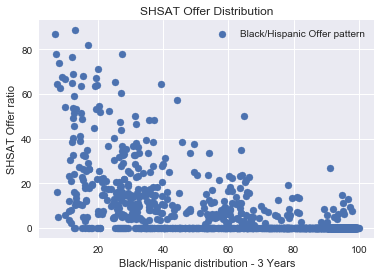

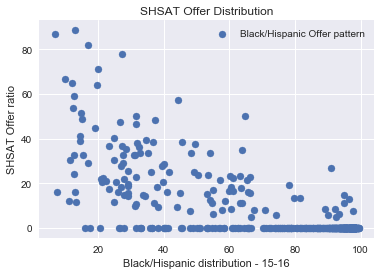

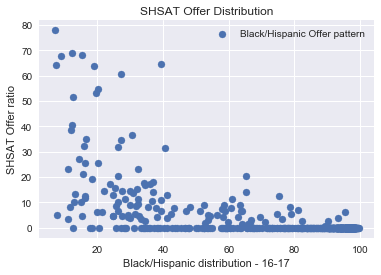

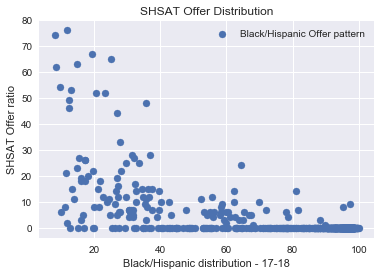

In [12]:
plt.scatter(shsat_df["% Black + Hispanic"],shsat_df["Offered_ratio"], label = 'Black/Hispanic Offer pattern', color ='b')
plt.xlabel('Black/Hispanic distribution - 3 Years')
plt.ylabel('SHSAT Offer ratio')
plt.title('SHSAT Offer Distribution')
plt.legend()
plt.show()

plt.scatter(shsat_1516["% Black + Hispanic"],shsat_1516["Offered_ratio"], label = 'Black/Hispanic Offer pattern', color ='b')
plt.xlabel('Black/Hispanic distribution - 15-16')
plt.ylabel('SHSAT Offer ratio')
plt.title('SHSAT Offer Distribution')
plt.legend()
plt.show()

plt.scatter(shsat_1617["% Black + Hispanic"],shsat_1617["Offered_ratio"], label = 'Black/Hispanic Offer pattern', color ='b')
plt.xlabel('Black/Hispanic distribution - 16-17')
plt.ylabel('SHSAT Offer ratio')
plt.title('SHSAT Offer Distribution')
plt.legend()
plt.show()

plt.scatter(shsat_1718["% Black + Hispanic"],shsat_1718["Offered_ratio"], label = 'Black/Hispanic Offer pattern', color ='b')
plt.xlabel('Black/Hispanic distribution - 17-18')
plt.ylabel('SHSAT Offer ratio')
plt.title('SHSAT Offer Distribution')
plt.legend()
plt.show()




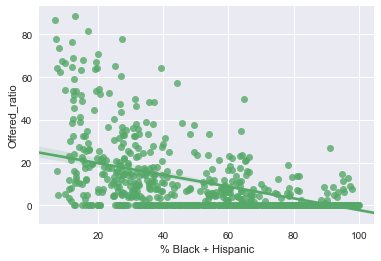

In [13]:
sns.regplot(x=shsat_df["% Black + Hispanic"], y=shsat_df["Offered_ratio"], color="g")

In [14]:
x=shsat_df["% Black + Hispanic"]
y=shsat_df["Offered_ratio"]
np.corrcoef(shsat_df["% Black + Hispanic"], shsat_df["Offered_ratio"])


array([[ 1.        , -0.62687776],
       [-0.62687776,  1.        ]])

Contrary to  my expectation,  the correlation co-efficient is only 62%.

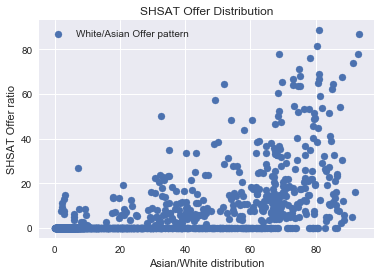

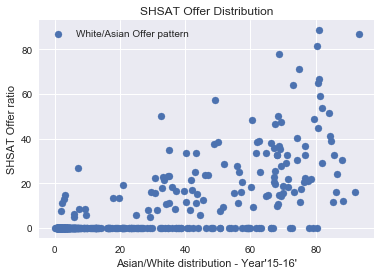

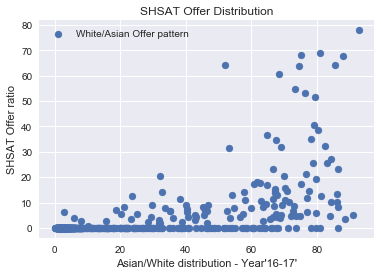

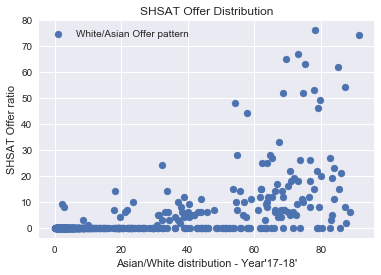

In [15]:
plt.scatter(shsat_df["% Asian + White"],shsat_df["Offered_ratio"], label = 'White/Asian Offer pattern', color ='b')
plt.xlabel('Asian/White distribution')
plt.ylabel('SHSAT Offer ratio')
plt.title('SHSAT Offer Distribution')
plt.legend()
plt.show()


plt.scatter(shsat_1516["% Asian + White"],shsat_1516["Offered_ratio"], label = 'White/Asian Offer pattern', color ='b')
plt.xlabel("Asian/White distribution - Year'15-16'")
plt.ylabel('SHSAT Offer ratio')
plt.title('SHSAT Offer Distribution')
plt.legend()
plt.show()

plt.scatter(shsat_1617["% Asian + White"],shsat_1617["Offered_ratio"], label = 'White/Asian Offer pattern', color ='b')
plt.xlabel("Asian/White distribution - Year'16-17'")
plt.ylabel('SHSAT Offer ratio')
plt.title('SHSAT Offer Distribution')
plt.legend()
plt.show()

plt.scatter(shsat_1718["% Asian + White"],shsat_1718["Offered_ratio"], label = 'White/Asian Offer pattern', color ='b')
plt.xlabel("Asian/White distribution - Year'17-18'")
plt.ylabel('SHSAT Offer ratio')
plt.title('SHSAT Offer Distribution')
plt.legend()
plt.show()



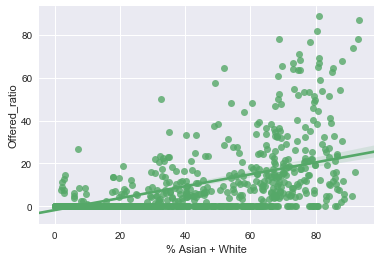

In [16]:
sns.regplot(x=shsat_df["% Asian + White"], y=shsat_df["Offered_ratio"], color="g")

In [17]:
x=shsat_df["% Asian + White"]
y=shsat_df["Offered_ratio"]
np.corrcoef(shsat_df["% Asian + White"], shsat_df["Offered_ratio"])

array([[1.        , 0.61842168],
       [0.61842168, 1.        ]])

Again the Offer ratio plotted against the White Asian population in middle schools also have a correlation coefficient of around 60% only.
However it is interesting to note that  the offer ratio goes up as the  White- Asian population  in schools go up, whereas , for the Black Hispaic population, with the increase in population, the offer rate was coming down

In [18]:
school["ELA_4s ratio"] = school["Grade 8 ELA 4s - All Students"] / school["Grade 8 ELA - All Students Tested"] * 100
school["ELA_4s ratio"] = school["ELA_4s ratio"].round(2)
school["Math_4s_ratio"] = school["Grade 8 Math 4s - All Students"] / school["Grade 8 Math - All Students Tested"] * 100
school["Math_4s_ratio"] = school["Math_4s_ratio"].round(2)
print(school.info(verbose=True))
shsat_dfs


<class 'pandas.core.frame.DataFrame'>
Int64Index: 356 entries, 3 to 1269
Data columns (total 163 columns):
Adjusted Grade                                        object
New?                                                  object
Other Location Code in LCGMS                          object
School Name                                           object
SED Code                                              int64
Location Code                                         object
District                                              int64
Latitude                                              float64
Longitude                                             float64
Address (Full)                                        object
City                                                  object
Zip                                                   int64
Grades                                                object
Grade Low                                             object
Grade High                              

,Feeder School DBN,Feeder School Name,Offered_ratio
0,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,0.00
1,01M140,P.S. 140 NATHAN STRAUS,0.00
2,01M184,P.S. 184M SHUANG WEN,48.72
4,01M301,"TECHNOLOGY, ARTS, AND SCIENCES STUDIO",0.00
6,01M378,SCHOOL FOR GLOBAL LEADERS,0.00
7,01M450,EAST SIDE COMMUNITY SCHOOL,0.00
8,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",71.05
9,01M839,TOMPKINS SQUARE MIDDLE SCHOOL,15.38
10,02M104,J.H.S. 104 SIMON BARUCH,25.64
11,02M114,EAST SIDE MIDDLE SCHOOL,64.95


In [19]:
shsat_dfshame = pd.merge(school,
                     shsat_dfs,
                     left_on= ['Location Code'],
                     right_on=['Feeder School DBN'],
                     how='left')

shsat_dfshame.dropna(subset=['Offered_ratio'])

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),City,Zip,Grades,Grade Low,Grade High,Community School?,Economic Need Index,School Income Estimate,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Rigorous Instruction Rating,Collaborative Teachers %,Collaborative Teachers Rating,Supportive Environment %,Supportive Environment Rating,Effective School Leadership %,Effective School Leadership Rating,Strong Family-Community Ties %,Strong Family-Community Ties Rating,Trust %,Trust Rating,Student Achievement Rating,Average ELA Proficiency,Average Math Proficiency,Grade 3 ELA - All Students Tested,Grade 3 ELA 4s - All Students,Grade 3 ELA 4s - American Indian or Alaska Native,Grade 3 ELA 4s - Black or African American,Grade 3 ELA 4s - Hispanic or Latino,Grade 3 ELA 4s - Asian or Pacific Islander,Grade 3 ELA 4s - White,Grade 3 ELA 4s - Multiracial,Grade 3 ELA 4s - Limited English Proficient,Grade 3 ELA 4s - Economically Disadvantaged,Grade 3 Math - All Students tested,Grade 3 Math 4s - All Students,Grade 3 Math 4s - American Indian or Alaska Native,Grade 3 Math 4s - Black or African American,Grade 3 Math 4s - Hispanic or Latino,Grade 3 Math 4s - Asian or Pacific Islander,Grade 3 Math 4s - White,Grade 3 Math 4s - Multiracial,Grade 3 Math 4s - Limited English Proficient,Grade 3 Math 4s - Economically Disadvantaged,Grade 4 ELA - All Students Tested,Grade 4 ELA 4s - All Students,Grade 4 ELA 4s - American Indian or Alaska Native,Grade 4 ELA 4s - Black or African American,Grade 4 ELA 4s - Hispanic or Latino,Grade 4 ELA 4s - Asian or Pacific Islander,Grade 4 ELA 4s - White,Grade 4 ELA 4s - Multiracial,Grade 4 ELA 4s - Limited English Proficient,Grade 4 ELA 4s - Economically Disadvantaged,Grade 4 Math - All Students Tested,Grade 4 Math 4s - All Students,Grade 4 Math 4s - American Indian or Alaska Native,Grade 4 Math 4s - Black or African American,Grade 4 Math 4s - Hispanic or Latino,Grade 4 Math 4s - Asian or Pacific Islander,Grade 4 Math 4s - White,Grade 4 Math 4s - Multiracial,Grade 4 Math 4s - Limited English Proficient,Grade 4 Math 4s - Economically Disadvantaged,Grade 5 ELA - All Students Tested,Grade 5 ELA 4s - All Students,Grade 5 ELA 4s - American Indian or Alaska Native,Grade 5 ELA 4s - Black or African American,Grade 5 ELA 4s - Hispanic or Latino,Grade 5 ELA 4s - Asian or Pacific Islander,Grade 5 ELA 4s - White,Grade 5 ELA 4s - Multiracial,Grade 5 ELA 4s - Limited English Proficient,Grade 5 ELA 4s - Economically Disadvantaged,Grade 5 Math - All Students Tested,Grade 5 Math 4s - All Students,Grade 5 Math 4s - American Indian or Alaska Native,Grade 5 Math 4s - Black or African American,Grade 5 Math 4s - Hispanic or Latino,Grade 5 Math 4s - Asian or Pacific Islander,Grade 5 Math 4s - White,Grade 5 Math 4s - Multiracial,Grade 5 Math 4s - Limited English Proficient,Grade 5 Math 4s - Economically Disadvantaged,Grade 6 ELA - All Students Tested,Grade 6 ELA 4s - All Students,Grade 6 ELA 4s - American Indian or Alaska Native,Grade 6 ELA 4s - Black or African American,Grade 6 ELA 4s - Hispanic or Latino,Grade 6 ELA 4s - Asian or Pacific Islander,Grade 6 ELA 4s - White,Grade 6 ELA 4s - Multiracial,Grade 6 ELA 4s - Limited English Proficient,Grade 6 ELA 4s - Economically Disadvantaged,Grade 6 Math - All Students Tested,Grade 6 Math 4s - All Students,Grade 6 Math 4s - American Indian or Alaska Native,Grade 6 Math 4s - Black or African American,Grade 6 Math 4s - Hispanic or Latino,Grade 6 Math 4s - Asian or Pacific Islander,Grade 6 Math 4s - White,Grade 6 Math 4s - Multiracial,Grade 6 Math 4s - Limited English Proficient,Grade 6 Math 4s - Economically Disadvantaged,Grade 7 ELA - All Students Tested,Grade 7 ELA 4s - All Students,Grade 7 ELA 4s - American Indian or Alaska Native,Grade 7 ELA 4s - Black or African American,Grade 7 ELA 4s - His

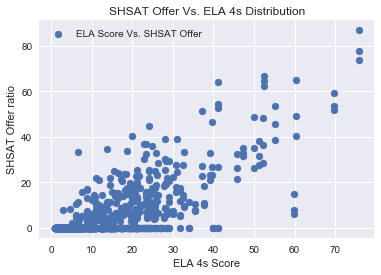

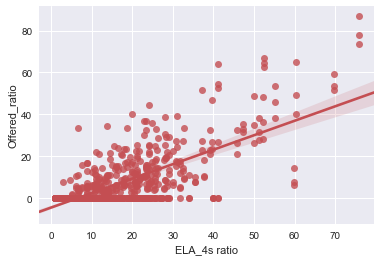

In [20]:

plt.scatter(shsat_dfshame["ELA_4s ratio"],shsat_dfshame["Offered_ratio"], label = 'ELA Score Vs. SHSAT Offer', color ='b')
plt.xlabel("ELA 4s Score")
plt.ylabel('SHSAT Offer ratio')
plt.title('SHSAT Offer Vs. ELA 4s Distribution')
plt.legend()
plt.show()
sns.regplot(x=shsat_dfshame["ELA_4s ratio"], y=shsat_dfshame["Offered_ratio"], color="r")



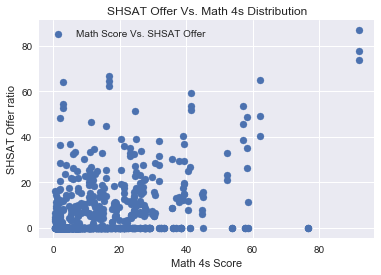

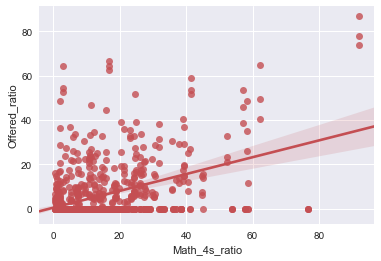

In [21]:
plt.scatter(shsat_dfshame["Math_4s_ratio"],shsat_dfshame["Offered_ratio"], label = 'Math Score Vs. SHSAT Offer', color ='b')
plt.xlabel("Math 4s Score")
plt.ylabel('SHSAT Offer ratio')
plt.title('SHSAT Offer Vs. Math 4s Distribution')
plt.legend()
plt.show()
sns.regplot(x=shsat_dfshame["Math_4s_ratio"], y=shsat_dfshame["Offered_ratio"], color="r")

From the scatterplot, though the ELA scores show a positive correlation with the Offer Ratio, the Math 4s score does not seem 
to have a strong correlation with the Offers received  from SPHS. 

In [27]:
school = pd.read_csv('2016 School Explorer.csv')
#safety = pd.read_csv('../input/eport/2010-2016-school-safety-report.csv')
schools = pd.read_csv('2013_-_2018_Demographic_Snapshot_School.csv')
shsat_1718 = pd.read_csv('2017-2018_SHSAT_Admissions_Test_Offers_By_Sending_School.csv')
shsat_1617 = pd.read_csv('2016-2017_SHSAT_Admissions_Test_Offers_By_Sending_School.csv')
shsat_1516 = pd.read_csv('2015-2016_SHSAT_Admissions_Test_Offers_By_Sending_School.csv')
school=school.loc[school['Grade High']== '08']
#school.drop(['Adjusted Grade','New?','Other Location Code in LCGMS','SED Code','Grades','Grade Low','Grade High','Percent ELL','Percent Asian','Percent Black','Percent Hispanic','Percent Black / Hispanic','Percent White'],axis =1, inplace = True)
school.drop(['Adjusted Grade','New?','Other Location Code in LCGMS','SED Code','Grades','Grade Low','Grade High','Percent ELL','Percent Asian','Percent Black','Percent Hispanic','Percent Black / Hispanic','Percent White','Grade 3 ELA - All Students Tested','Grade 3 ELA 4s - All Students','Grade 3 ELA 4s - American Indian or Alaska Native','Grade 3 ELA 4s - Black or African American','Grade 3 ELA 4s - Hispanic or Latino','Grade 3 ELA 4s - Asian or Pacific Islander','Grade 3 ELA 4s - White','Grade 3 ELA 4s - Multiracial','Grade 3 ELA 4s - Limited English Proficient','Grade 3 ELA 4s - Economically Disadvantaged','Grade 3 Math - All Students tested','Grade 3 Math 4s - All Students','Grade 3 Math 4s - American Indian or Alaska Native','Grade 3 Math 4s - Black or African American','Grade 3 Math 4s - Hispanic or Latino','Grade 3 Math 4s - Asian or Pacific Islander','Grade 3 Math 4s - White','Grade 3 Math 4s - Multiracial','Grade 3 Math 4s - Limited English Proficient','Grade 3 Math 4s - Economically Disadvantaged','Grade 4 ELA - All Students Tested','Grade 4 ELA 4s - All Students','Grade 4 ELA 4s - American Indian or Alaska Native','Grade 4 ELA 4s - Black or African American','Grade 4 ELA 4s - Hispanic or Latino','Grade 4 ELA 4s - Asian or Pacific Islander','Grade 4 ELA 4s - White','Grade 4 ELA 4s - Multiracial','Grade 4 ELA 4s - Limited English Proficient','Grade 4 ELA 4s - Economically Disadvantaged','Grade 4 Math - All Students Tested','Grade 4 Math 4s - All Students','Grade 4 Math 4s - American Indian or Alaska Native','Grade 4 Math 4s - Black or African American','Grade 4 Math 4s - Hispanic or Latino','Grade 4 Math 4s - Asian or Pacific Islander','Grade 4 Math 4s - White','Grade 4 Math 4s - Multiracial','Grade 4 Math 4s - Limited English Proficient','Grade 4 Math 4s - Economically Disadvantaged','Grade 5 ELA - All Students Tested','Grade 5 ELA 4s - All Students','Grade 5 ELA 4s - American Indian or Alaska Native','Grade 5 ELA 4s - Black or African American','Grade 5 ELA 4s - Hispanic or Latino','Grade 5 ELA 4s - Asian or Pacific Islander','Grade 5 ELA 4s - White','Grade 5 ELA 4s - Multiracial','Grade 5 ELA 4s - Limited English Proficient','Grade 5 ELA 4s - Economically Disadvantaged','Grade 5 Math - All Students Tested','Grade 5 Math 4s - All Students','Grade 5 Math 4s - American Indian or Alaska Native','Grade 5 Math 4s - Black or African American','Grade 5 Math 4s - Hispanic or Latino','Grade 5 Math 4s - Asian or Pacific Islander','Grade 5 Math 4s - White','Grade 5 Math 4s - Multiracial','Grade 5 Math 4s - Limited English Proficient','Grade 5 Math 4s - Economically Disadvantaged','Grade 6 ELA - All Students Tested','Grade 6 ELA 4s - All Students','Grade 6 ELA 4s - American Indian or Alaska Native','Grade 6 ELA 4s - Black or African American','Grade 6 ELA 4s - Hispanic or Latino','Grade 6 ELA 4s - Asian or Pacific Islander','Grade 6 ELA 4s - White','Grade 6 ELA 4s - Multiracial','Grade 6 ELA 4s - Limited English Proficient','Grade 6 ELA 4s - Economically Disadvantaged','Grade 6 Math - All Students Tested','Grade 6 Math 4s - All Students','Grade 6 Math 4s - American Indian or Alaska Native','Grade 6 Math 4s - Black or African American','Grade 6 Math 4s - Hispanic or Latino','Grade 6 Math 4s - Asian or Pacific Islander','Grade 6 Math 4s - White','Grade 6 Math 4s - Multiracial','Grade 6 Math 4s - Limited English Proficient','Grade 6 Math 4s - Economically Disadvantaged','Grade 7 ELA - All Students Tested','Grade 7 ELA 4s - All Students','Grade 7 ELA 4s - American Indian or Alaska Native','Grade 7 ELA 4s - Black or African American','Grade 7 ELA 4s - Hispanic or Latino','Grade 7 ELA 4s - Asian or Pacific Islander','Grade 7 ELA 4s - White','Grade 7 ELA 4s - Multiracial','Grade 7 ELA 4s - Limited English Proficient','Grade 7 ELA 4s - Economically Disadvantaged','Grade 7 Math - All Students Tested','Grade 7 Math 4s - All Students','Grade 7 Math 4s - American Indian or Alaska Native','Grade 7 Math 4s - Black or African American','Grade 7 Math 4s - Hispanic or Latino','Grade 7 Math 4s - Asian or Pacific Islander','Grade 7 Math 4s - White','Grade 7 Math 4s - Multiracial','Grade 7 Math 4s - Limited English Proficient','Grade 7 Math 4s - Economically Disadvantaged' ],axis =1, inplace = True)
def stripsoff(x):
    return float(x.strip('%'))

def stripsoff_dollar(x):
    return str(x.strip('$'))

school["Student Attendance Rate"] = school["Student Attendance Rate"].astype(str).apply(stripsoff)
school["Percent of Students Chronically Absent"] = school["Percent of Students Chronically Absent"].astype(str).apply(stripsoff)
school["Rigorous Instruction %"] = school["Rigorous Instruction %"].astype(str).apply(stripsoff)
school["Collaborative Teachers %"] = school["Collaborative Teachers %"].astype(str).apply(stripsoff)
school["Supportive Environment %"] = school["Supportive Environment %"].astype(str).apply(stripsoff)
school["Effective School Leadership %"] = school["Effective School Leadership %"].astype(str).apply(stripsoff)
school["Strong Family-Community Ties %"] = school["Strong Family-Community Ties %"].astype(str).apply(stripsoff)
school["Trust %"] = school["Trust %"].astype(str).apply(stripsoff)
school['School Income Estimate']=school['School Income Estimate'].replace({'\$':'', ',':''},regex=True).astype(float)

school=school.replace(to_replace='Exceeding Target',value='1',regex=True)
school=school.replace(to_replace='Meeting Target',value='2',regex=True)
school=school.replace(to_replace='Approaching Target',value='3',regex=True)
school=school.replace(to_replace='Not 2',value='2',regex=True)
school.fillna('0', inplace=True)
schools
schools_df = schools.loc[(schools['Grade 8'] != 0)]
schools_df= schools_df[schools_df['Economic Need Index'] !='No Data']
def stripsoff(x):
    return float(x.strip('%'))


schools_df["Economic Need Index"] = schools_df["Economic Need Index"].astype(str).apply(stripsoff)
schools_df.loc[schools_df["Economic Need Index"] == 0, "Economic Need Index"] = schools_df["Economic Need Index"].mean()


schools_df["% Female"] = schools_df["% Female"].astype(str).apply(stripsoff)
schools_df["% Male"] = schools_df["% Male"].astype(str).apply(stripsoff)
schools_df["% Asian"] = schools_df["% Asian"].astype(str).apply(stripsoff)
schools_df["% Black"] = schools_df["% Black"].astype(str).apply(stripsoff)
schools_df["% Hispanic"] = schools_df["% Hispanic"].astype(str).apply(stripsoff)
schools_df["% White"] = schools_df["% White"].astype(str).apply(stripsoff)
schools_df["% English Language Learners"] = schools_df["% English Language Learners"].astype(str).apply(stripsoff)
schools_df["% Poverty"] = schools_df["% Poverty"].astype(str).apply(stripsoff)
schools_df["% Multiple Race Categories Not Represented"] = schools_df["% Multiple Race Categories Not Represented"].astype(str).apply(stripsoff)
schools_df["% Students with Disabilities"] = schools_df["% Students with Disabilities"].astype(str).apply(stripsoff)

schools_df["% Black + Hispanic"] = schools_df["% Black"] + schools_df["% Hispanic"]
schools_df["Bl+Hi_Grade8"] = (schools_df["% Black + Hispanic"] * schools_df["Grade 8"]) / 100
schools_df["Bl+Hi_Grade8"] = schools_df["Bl+Hi_Grade8"].round()

schools_df["% Asian + White"] = schools_df["% Asian"] + schools_df["% White"]
schools_df["As+Wh_Grade8"] = (schools_df["% Asian + White"] * schools_df["Grade 8"]) / 100
schools_df["As+Wh_Grade8"] = schools_df["As+Wh_Grade8"].round()


schools_df["% Others"] =(100-(schools_df["% Black"] + schools_df["% Hispanic"] + schools_df["% White"] + schools_df["% Asian"])).round()


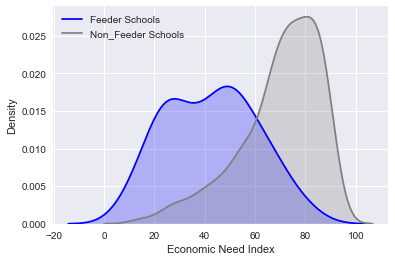

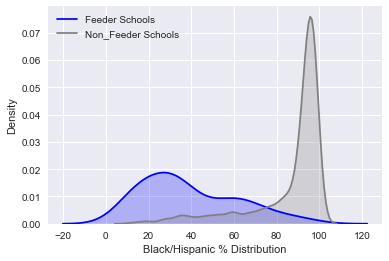

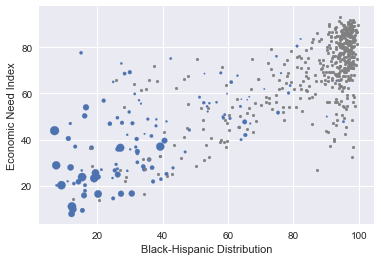

array([[1.        , 0.78797633],
       [0.78797633, 1.        ]])

In [28]:
schools_df =pd.merge(schools_df, 
                  school,
                  left_on= ['DBN'],
                  right_on=['Location Code'],
                  how='left')
schools_df.drop(['Grade K','Grade 1','Grade 2','Grade 3','Grade 4','Grade 5','Grade 6','Grade 7','Grade 9','Grade 10','Grade 11','Grade 12'],axis =1, inplace = True)

schools_df=schools_df.replace(to_replace='Not 2',value='2',regex=True)
schools_df.dropna()
shsat_1516["Year"] = '2015-16'
shsat_1516.loc[shsat_1516["Count of Offers"] == "0-5", "Count of Offers"] = "0"
shsat_1516.loc[shsat_1516["Count of Testers"] == "0-5", "Count of Testers"] = "0"
shsat_1516.loc[shsat_1516["Count of Students in HS Admissions"] == "0-5", "Count of Students in HS Admissions"] = "0"
shsat_1516["Training_Need_Score"] = (shsat_1516["Count of Offers"].astype(float) / shsat_1516["Count of Students in HS Admissions"].astype(float))*100
shsat_1516["Training_Need_Score"] = shsat_1516["Training_Need_Score"].round()
shsat_1516 = shsat_1516.dropna(subset= ['Training_Need_Score'])

shsat_1617["Year"] = '2016-17'
shsat_1617.loc[shsat_1617["Count of Offers"] == "0-5", "Count of Offers"] = "0"
shsat_1617.loc[shsat_1617["Count of Testers"] == "0-5", "Count of Testers"] = "0"
shsat_1617.loc[shsat_1617["Count of Students in HS Admissions"] == "0-5", "Count of Students in HS Admissions"] = "0"
shsat_1617["Training_Need_Score"] = (shsat_1617["Count of Offers"].astype(float) / shsat_1617["Count of Students in HS Admissions"].astype(float))*100
shsat_1617["Training_Need_Score"] = shsat_1617["Training_Need_Score"].round()
shsat_1617 = shsat_1617.dropna(subset= ['Training_Need_Score'])


shsat_1718["Year"] = '2017-18'
shsat_1718.loc[shsat_1718["Count of Offers"] == "0-5", "Count of Offers"] = "0"
shsat_1718.loc[shsat_1718["Count of Testers"] == "0-5", "Count of Testers"] = "0"
shsat_1718.loc[shsat_1718["Count of Students in HS Admissions"] == "0-5", "Count of Students in HS Admissions"] = "0"
shsat_1718["Training_Need_Score"] = (shsat_1718["Count of Offers"].astype(float) / shsat_1718["Count of Students in HS Admissions"].astype(float))*100
shsat_1718["Training_Need_Score"] = shsat_1718["Training_Need_Score"].round()
shsat_1718 = shsat_1718.dropna(subset= ['Training_Need_Score'])

shsat = [shsat_1516, shsat_1617, shsat_1718]
shsat_df = pd.concat(shsat, sort = True)


shsat_df.loc[shsat_df["Count of Offers"] == "0-5", "Count of Offers"] = "0"
shsat_df.loc[shsat_df["Count of Testers"] == "0-5", "Count of Testers"] = "0"
shsat_df.loc[shsat_df["Count of Students in HS Admissions"] == "0-5", "Count of Students in HS Admissions"] = "0"
shsat_df["Awareness_Need_Score"] = (shsat_df["Count of Testers"].astype(float) / shsat_df["Count of Students in HS Admissions"].astype(float))*100
shsat_df["Awareness_Need_Score"] = shsat_df["Awareness_Need_Score"].round(2)
shsat_df["Training_Need_Score"] = (shsat_df["Count of Offers"].astype(float) / shsat_df["Count of Students in HS Admissions"].astype(float))*100
shsat_df["Training_Need_Score"] = shsat_df["Training_Need_Score"].round(2)



shsat_df = shsat_df.dropna(subset= ['Training_Need_Score'])
shsat_df = shsat_df.dropna(subset= ['Awareness_Need_Score'])
shsat_df.sort_values("Feeder School DBN",inplace=True)



school_merg = pd.merge(schools_df, 
                  shsat_df,
                  left_on= ['DBN'],
                  right_on=['Feeder School DBN'],
                  how='left')
                  
school_merg=school_merg.loc[(school_merg['Year_x']=='2016-17') & (school_merg['Year_y']=='2016-17')]
school_merg.fillna(0, inplace=True)


school_merg.loc[school_merg['Training_Need_Score'] != 0, "School_type"] = "Feeder"

school_merg.loc[school_merg['Training_Need_Score'] == 0, "School_type"] = "Non_Feeder"
Feeder_schools_df = school_merg.loc[school_merg['Training_Need_Score'] != 0] 
Non_feeder_schools_df =  school_merg.loc[school_merg['Training_Need_Score'] == 0]


Feeder_Schools= school_merg[school_merg['School_type']=='Feeder']
Non_Feeder_Schools = school_merg[school_merg['School_type'] =='Non_Feeder']

sns.kdeplot(Feeder_Schools['Economic Need Index_x'],shade= True, color ='blue',label='Feeder Schools')
sns.kdeplot(Non_Feeder_Schools['Economic Need Index_x'],shade= True, color ='grey', label ='Non_Feeder Schools')
plt.xlabel('Economic Need Index')
plt.ylabel('Density')
plt.show()

sns.kdeplot(Feeder_Schools['% Black + Hispanic'],shade= True, color ='blue',label='Feeder Schools')
sns.kdeplot(Non_Feeder_Schools['% Black + Hispanic'],shade= True, color ='grey', label ='Non_Feeder Schools')
plt.xlabel('Black/Hispanic % Distribution')
plt.ylabel('Density')
plt.show()

plt.scatter(Feeder_Schools['% Black + Hispanic'],Feeder_Schools['Economic Need Index_x'],s=Feeder_Schools['Training_Need_Score'])
plt.scatter(Non_Feeder_Schools['% Black + Hispanic'],Non_Feeder_Schools['Economic Need Index_x'], color='grey', s=8)
plt.ylabel('Economic Need Index')
plt.xlabel('Black-Hispanic Distribution')
plt.show()

np.corrcoef(school_merg["% Black + Hispanic"], school_merg["Economic Need Index_x"])

 From the above graphs, it can be seen that the feeder schools and non-feeder schools are strikingly different in terms of their racial composition and economic need level. Not only are Asian, Caucasian and high-income students more likely to attend SPHS, but interestingly enough the students attending these middle schools have a  higher proportion of Asian and Caucasian students with lower economic need.

The scatterplot above visualizes the positive correlation (r = 0.78) between Economic Need Index and % Black and Hispanic students. Feeder schools with more students admitted to SPHS (larger-sized blue points) tend to have low-to-medium economic need and lower proportion of Black or Hispanic students, while a noticeable number of non-feeder schools (gray points) cluster around the upper right corner of the plot. In other words, students from these non-feeder schools are mostly low-income Hispanic or Black student that are underrepresented at SPHS.

These analyses implies that if I assign the schools a performance score based on select features  from this data and rank them according to the score, it would help me find the schools that need asistance.
And the demographic relations between multiple features and labels from the abpve EDA indicate, that they would in turn help the low income  Black and Hispanic families in the hood  who  would do well with training programs and benefit from awareness sessions in hood schools